# Project

## 1. Title of the Project:
Sentiment analysis of IMDB movie reviews

## 2. Brief on the Project:
Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique that involves analyzing and determining the sentiment or subjective information expressed in a piece of text. It aims to understand the underlying sentiment, emotion, or opinion of the writer or speaker.The goal of sentiment analysis is to classify text into predefined sentiment categories, such as positive, negative, or neutral. It helps in extracting subjective information from text data and provides insights into the overall sentiment or attitude of individuals or groups towards a particular topic, product, service, or event.

The IMDB dataset used in this project is having 50K movie reviews for natural language processing or Text analytics.This is a dataset for binary sentiment classification containing positive (1) and negative (2). A dataset of 25,000 highly polar movie reviews for training and 25,000 for testing is provided. Thus the task is to predict the number of positive and negative reviews using either classification or deep learning algorithms.

## 3. Steps for project completion:
    a. Collecting and analyzing the data
    b. Feature selection and feature engineering
    c. EDA & Data Visualization part
    d. Model building
    e. Checking training and testing accuracy
    Algorithms used are TF-IDF, Logistic Regression, Support Vector Classifier, 
    Naive Bayes, Decision Tree, Random Forest, Adaboost 
    f. Accuracy score comparison and best model selection
    g. Optimizing the model    

## 4. Resources:

### Data source: 
http://ai.stanford.edu/~amaas/data/sentiment/

### Tools:
Jupyter Notebook used for data analysis and model building.
Programming language used is Python.

## 5. Individual Details:
Name: Vidit Kumar Pal, Email: vidit.20.pal@gmail.com, Contact: +91-7985431988

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import emoji
import string
import nltk
from PIL import Image
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import pickle

In [2]:
data=pd.read_csv('D:\Data Science\iit guwahati\course\projects made\Sentiment analysis on IMDB dataset\IMDB Dataset.csv')

In [3]:
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [5]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [6]:
data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [7]:
data['sentiment_encoded']=data['sentiment'].replace({'positive':1,'negative':2})

In [8]:
data.head()

,review,sentiment,sentiment_encoded
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,2
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [9]:
stop_words=set(stopwords.words('english'))

## Preprocessing of Text

### Function to Remove Emojis

In [10]:
def strip_emoji(text):
    return emoji.replace_emoji(text,replace="")

### Function to Convert text to lowercase,remove (/r,/n characters), URLs, non-utf characters, Numbers, punctutations, stopwords

In [11]:
def strip_all_entities(text):
    text = text.replace('\r', '').replace('\n', ' ').lower()
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)
    text = re.sub(r'[^\x00-\x7f]',r'', text)
    text = re.sub(r'(.)1+', r'1', text)
    text = re.sub('[0-9]+', '', text)
    stopchars= string.punctuation
    table = str.maketrans('', '', stopchars)
    text = text.translate(table)
    text = [word for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

### Function to remove contractions

In [12]:
def decontract(text):
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

### Function to clean hashtags

In [13]:
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet))
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet))
    return new_tweet2

### Function to filter Special Characters such as $, &

In [14]:
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

### Function to remove multiple sequence spaces

In [15]:
def remove_mult_spaces(text):
    return re.sub("\s\s+"," ",text)

### Function to apply stemming to words

In [16]:
def stemmer(text):
    tokenized = nltk.word_tokenize(text)
    ps = PorterStemmer()
    return ' '.join([ps.stem(words) for words in tokenized])

### Function to apply lemmatization to words

In [17]:
def lemmatize(text):
    tokenized = nltk.word_tokenize(text)
    lm = WordNetLemmatizer()
    return ' '.join([lm.lemmatize(words) for words in tokenized])

### Function to Preprocess the text by applying all above functions

In [18]:
def preprocess(text):
    text = strip_emoji(text)
    text = decontract(text)
    text = strip_all_entities(text)
    text = clean_hashtags(text)
    text = filter_chars(text)
    text = remove_mult_spaces(text)
    text = stemmer(text)
    text = lemmatize(text)
    return text

In [19]:
data['cleaned_review']=data['review'].apply(preprocess)
data.head()

,review,sentiment,sentiment_encoded,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,1,one review mention watch oz episod hook right ...
1,A wonderful little production. <br /><br />The...,positive,1,wonder littl product br br film techniqu unass...
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonder way spend time hot summer weeke...
3,Basically there's a family where a little boy ...,negative,2,basic famili littl boy jake think zombi closet...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visual stun film...


### Cleaned review added

### Dealing with Duplicates

In [20]:
data["cleaned_review"].duplicated().sum()

423

In [21]:
data.drop_duplicates("cleaned_review", inplace=True)

### Duplicates removed

### Tokenization

In [22]:
data['review_list'] = data['cleaned_review'].apply(word_tokenize)
data.head()

,review,sentiment,sentiment_encoded,cleaned_review,review_list
0,One of the other reviewers has mentioned that ...,positive,1,one review mention watch oz episod hook right ...,"[one, review, mention, watch, oz, episod, hook..."
1,A wonderful little production. <br /><br />The...,positive,1,wonder littl product br br film techniqu unass...,"[wonder, littl, product, br, br, film, techniq..."
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonder way spend time hot summer weeke...,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,negative,2,basic famili littl boy jake think zombi closet...,"[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visual stun film...,"[petter, mattei, love, time, money, visual, st..."


### Checking length of various tweet texts

In [23]:
review_len = []
for text in data.review_list:
    review_length = len(text)
    review_len.append(review_length)
data['review_len'] = review_len

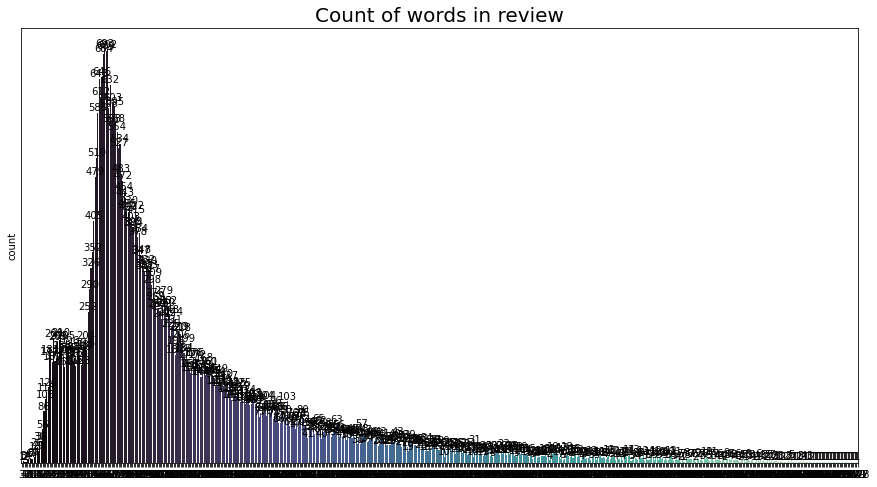

In [24]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x='review_len', data=data, palette='mako')
plt.title('Count of words in review', fontsize=20)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

### Removing text without words

In [25]:
data = data[data['review_len']!=0]

In [26]:
data.shape

(49577, 6)

### Splitting data based on sentiment for Data Exploration

In [27]:
positive = data[data['sentiment']=='positive']
negative = data[data['sentiment']=='negative']

### EDA Part

### Positive Reviews

In [28]:
pos = Counter([item for sublist in positive['review_list'] for item in sublist])
top20_positive = pd.DataFrame(pos.most_common(20))
top20_positive.columns = ['Top Words','Count']
top20_positive.style.background_gradient(cmap='Greens')

,Top Words,Count
0,br,55377
1,film,48846
2,movi,42903
3,one,27203
4,like,19898
5,time,15410
6,see,14691
7,good,14552
8,stori,13624
9,charact,13575


Text(0.5, 1.0, 'Top 20 words in positive reviews')

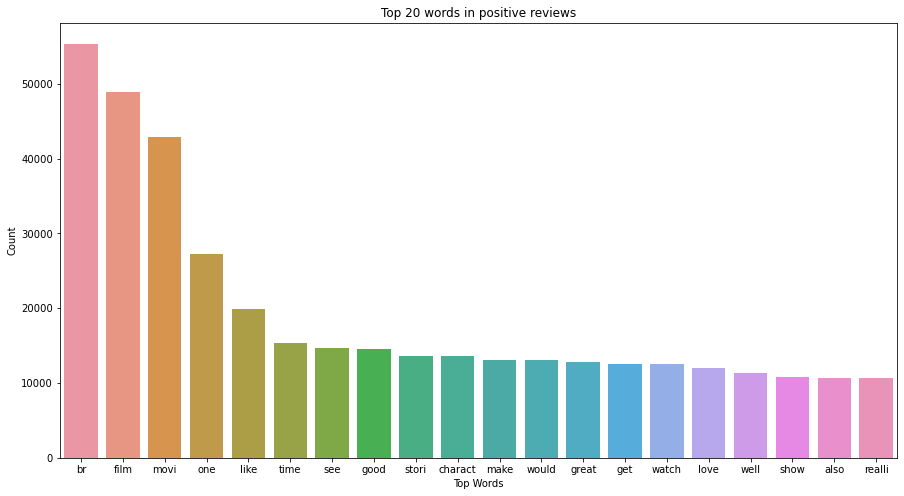

In [29]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_positive, y="Count", x="Top Words")
plt.title("Top 20 words in positive reviews")

### Negative Reviews

In [30]:
neg = Counter([item for sublist in negative['review_list'] for item in sublist])
top20_negative = pd.DataFrame(neg.most_common(20))
top20_negative.columns = ['Top Words','Count']
top20_negative.style.background_gradient(cmap='Greens')

,Top Words,Count
0,br,58148
1,movi,55269
2,film,42592
3,one,25701
4,like,23716
5,would,17662
6,make,15274
7,even,15106
8,get,14984
9,watch,14491


Text(0.5, 1.0, 'Top 20 words in negative reviews')

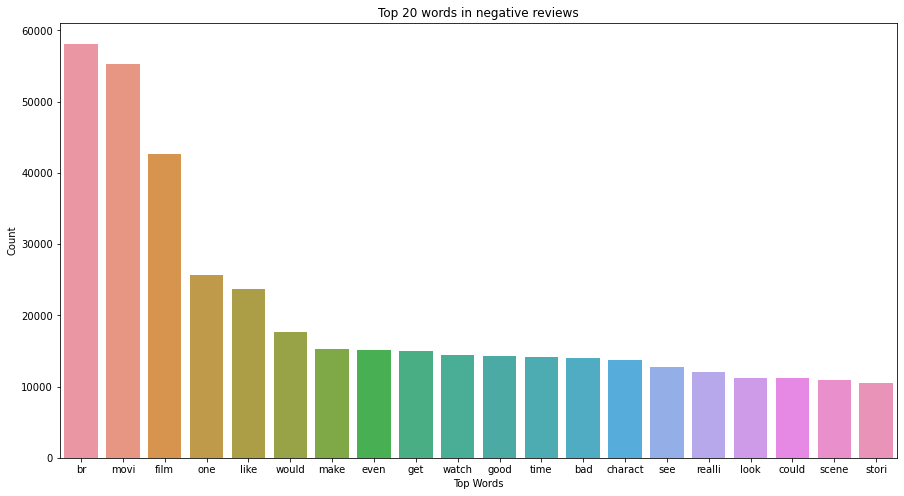

In [31]:
fig = plt.figure(figsize=(15,8))
sns.barplot(data=top20_negative, y="Count", x="Top Words")
plt.title("Top 20 words in negative reviews")

In [32]:
data.head()

,review,sentiment,sentiment_encoded,cleaned_review,review_list,review_len
0,One of the other reviewers has mentioned that ...,positive,1,one review mention watch oz episod hook right ...,"[one, review, mention, watch, oz, episod, hook...",166
1,A wonderful little production. <br /><br />The...,positive,1,wonder littl product br br film techniqu unass...,"[wonder, littl, product, br, br, film, techniq...",90
2,I thought this was a wonderful way to spend ti...,positive,1,thought wonder way spend time hot summer weeke...,"[thought, wonder, way, spend, time, hot, summe...",86
3,Basically there's a family where a little boy ...,negative,2,basic famili littl boy jake think zombi closet...,"[basic, famili, littl, boy, jake, think, zombi...",67
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei love time money visual stun film...,"[petter, mattei, love, time, money, visual, st...",130


In [33]:
X,Y = data['cleaned_review'],data['sentiment_encoded']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify =Y, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(34703,) (34703,) (14874,) (14874,)


### tf-idf Vectorization

In [35]:
tf_idf = TfidfVectorizer()
X_train_tf = tf_idf.fit_transform(X_train)
X_test_tf = tf_idf.transform(X_test)
print(X_train_tf.shape)
print(X_test_tf.shape)

(34703, 111336)
(14874, 111336)


### Trying Different ML Models

### Logistic Regression

In [36]:
lr=LogisticRegression()

In [37]:
lr_cv_score=cross_val_score(lr,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)

In [38]:
mean_lr_cv = np.mean(lr_cv_score)
mean_lr_cv

0.8873515840616524

### Support Vector Classifier

In [39]:
lin_svc = LinearSVC()

In [40]:
lin_svc_cv_score = cross_val_score(lin_svc,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_lin_svc_cv = np.mean(lin_svc_cv_score)
mean_lin_svc_cv

0.8878026604632915

### Naive Bayes Classifier

In [41]:
multiNB = MultinomialNB()

In [42]:
multiNB_cv_score = cross_val_score(multiNB,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_multiNB_cv = np.mean(multiNB_cv_score)
mean_multiNB_cv

0.8591135449404774

### Decision Tree Classifier

In [43]:
dtree = DecisionTreeClassifier()

In [44]:
dtree_cv_score = cross_val_score(dtree,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_dtree_cv = np.mean(dtree_cv_score)
mean_dtree_cv

0.7126976863178092

### Random Forest Classifier

In [45]:
rand_forest = RandomForestClassifier()

In [46]:
rand_forest_cv_score = cross_val_score(rand_forest,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)

In [47]:
mean_rand_forest_cv = np.mean(rand_forest_cv_score)
mean_rand_forest_cv

0.8461494672540495

### Adaboost Classifier

In [48]:
adab=AdaBoostClassifier()

In [49]:
adab_cv_score = cross_val_score(adab,X_train_tf,y_train,cv=5,scoring='f1_macro',n_jobs=-1)
mean_adab_cv = np.mean(adab_cv_score)
mean_adab_cv

0.8043441627809322

##### By trying different models we can see logistic regression, svm and random forest classifier performed similarly, so among these we will go with svm model as it is more generalised and light.

### Fine tuning SVC

In [50]:
svc1 = LinearSVC()
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10],
'loss':['hinge','squared_hinge'],
'fit_intercept':[True,False]}
grid_search = GridSearchCV(svc1,param_grid,cv=5,scoring='f1_macro',n_jobs=-1,verbose=0,return_train_score=True)
grid_search.fit(X_train_tf,y_train)

GridSearchCV(cv=5, estimator=LinearSVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'fit_intercept': [True, False],
                         'loss': ['hinge', 'squared_hinge']},
             return_train_score=True, scoring='f1_macro')

In [51]:
grid_search.best_estimator_

LinearSVC(C=1, fit_intercept=False, loss='hinge')

In [52]:
grid_search.best_score_

0.8892938348294368

### Model Evluation

In [53]:
lin_svc.fit(X_train_tf,y_train)
y_pred = lin_svc.predict(X_test_tf)

In [54]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('Truth')
    plt.xlabel('Prediction')

In [55]:
review=['positive','negative']

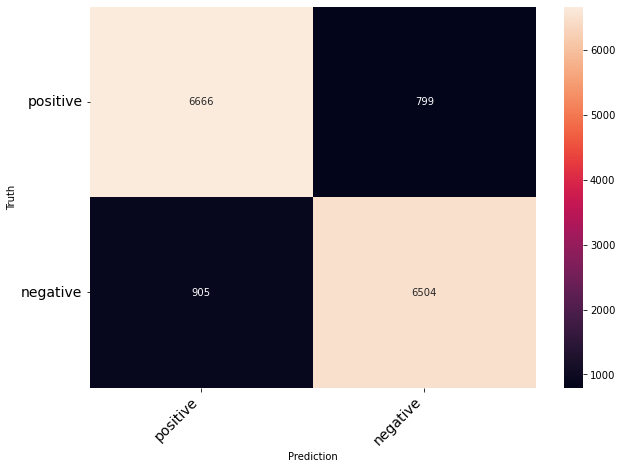

In [56]:
cm = confusion_matrix(y_test,y_pred)
print_confusion_matrix(cm,review)

In [57]:
print('Classification Report:\n',classification_report(y_test, y_pred, target_names=review))

Classification Report:
               precision    recall  f1-score   support

    positive       0.88      0.89      0.89      7465
    negative       0.89      0.88      0.88      7409

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



### Saving the model

In [58]:
pickle.dump(tf_idf, open('IMDBvectorizer.pkl', 'wb'))
pickle.dump(lin_svc, open('IMDBmodel.pkl', 'wb'))

## 6. Final Report:
### Data Analysis and Treatment:
    a. There are 50000 rows and 2 columns
    b. There are no missing values
    c. There is one target variable: 'Sentiment'
    d. It is the case of binary classification with target variable "Sentiment" having two labels as positive and negative.
    e. The best prforming model is SVC (Support Vector Classifier) with accuracy score of 88.92%. 